Normalizamos los nombres de las tablas

In [78]:
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
import numpy as np
import copy as copy

In [79]:
def ls(ruta = "./Datasets"):
    return [arch.name for arch in os.scandir(ruta) if arch.is_file()]

In [80]:
archivos = ls()
archivos = archivos[1:]

ruta = "./Datasets/"

data = []
codificacion = ['utf-8','utf-8','utf-8','utf-8','ANSI','utf-8','utf-8','utf-8']
u = 0
for i in archivos:
    r = ruta+i
    g = open(r,encoding=codificacion[u])
    n = 1
    for i in g:
        #print(i)
        if ',' in i:
            #print('Delimiter coma')
            data.append(pd.read_csv(r,encoding=codificacion[u]))
        else:
            #print('delimiter punto y coma')
            data.append(pd.read_csv(r,delimiter=';',encoding=codificacion[u]))
        break
    #print(u,r)
    g.close()
    u+=1

In [81]:
archivos

['Clientes.csv',
 'Compra.csv',
 'Gasto.csv',
 'Localidades.csv',
 'Proveedores.csv',
 'Sucursales.csv',
 'TiposDeGasto.csv',
 'Venta.csv']

In [82]:
localidades = data[3]

In [83]:
localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   categoria                4142 non-null   object 
 1   centroide_lat            4142 non-null   float64
 2   centroide_lon            4142 non-null   float64
 3   departamento_id          4141 non-null   float64
 4   departamento_nombre      4141 non-null   object 
 5   fuente                   4142 non-null   object 
 6   id                       4142 non-null   int64  
 7   localidad_censal_id      4142 non-null   int64  
 8   localidad_censal_nombre  4142 non-null   object 
 9   municipio_id             3599 non-null   float64
 10  municipio_nombre         3648 non-null   object 
 11  nombre                   4142 non-null   object 
 12  provincia_id             4142 non-null   int64  
 13  provincia_nombre         4142 non-null   object 
dtypes: float64(4), int64(3),

In [84]:
localidades[localidades.nombre == 'MECHITA']

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
2,Componente de localidad compuesta,-35.068014,-60.402597,6021.0,Alberti,INDEC,6021030000,6021030,Mechita,60021.0,Alberti,MECHITA,6,Buenos Aires
99,Componente de localidad compuesta,-35.069938,-60.408494,6112.0,Bragado,INDEC,6112070000,6112070,Mechita,60112.0,Bragado,MECHITA,6,Buenos Aires


In [85]:
localidades[localidades.id.duplicated() == True].shape

(0, 14)

Añadimos un ID la tabla localidades

In [86]:
data[3] = data[3].reset_index()

In [87]:
data[3].head()

,index,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,0,Localidad simple,-35.033073,-60.280620,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires
1,1,Localidad simple,-34.868119,-60.393971,6021.0,Alberti,INDEC,6021020000,6021020,Coronel Seguí,60021.0,Alberti,CORONEL SEGUI,6,Buenos Aires
2,2,Componente de localidad compuesta,-35.068014,-60.402597,6021.0,Alberti,INDEC,6021030000,6021030,Mechita,60021.0,Alberti,MECHITA,6,Buenos Aires
3,3,Localidad simple,-35.124382,-60.220061,6021.0,Alberti,INDEC,6021040000,6021040,Pla,60021.0,Alberti,PLA,6,Buenos Aires
4,4,Localidad simple,-35.109618,-60.070551,6021.0,Alberti,INDEC,6021050000,6021050,Villa Grisolía,60021.0,Alberti,VILLA GRISOLIA,6,Buenos Aires


In [88]:
data[3]['index'] = data[3]['id']
data[3].drop(columns = ['id'], axis=1,inplace=True)

Renombrar las columnas de ID en las tablas

In [89]:
for word in archivos:
    if '2020' not in word:
        print(word[:-4])

Clientes
Compra
Gasto
Localidades
Proveedores
Sucursales
TiposDeGasto
Venta


In [90]:
# example_df.rename(columns={'Marks': 'Roll_no', 'Roll_no': 'Marks'}, inplace=True)

for idx, table in enumerate(data):
    if '2020' not in data[idx]:
        name = 'ID_'+archivos[idx][:-4]
        data[idx].rename(columns={table.columns[0] : name}, inplace=True)

In [91]:
for idx, table in enumerate(data):
    print(list(table.columns))
    #if 'Id' in list(table.columns)[0] :
    #    print('ID_'+ archivos[idx][:-4])

['ID_Clientes', 'Provincia', 'Nombre_y_Apellido', 'Domicilio', 'Telefono', 'Edad', 'Localidad', 'X', 'Y', 'col10']
['ID_Compra', 'Fecha', 'Fecha_Año', 'Fecha_Mes', 'Fecha_Periodo', 'IdProducto', 'Cantidad', 'Precio', 'IdProveedor']
['ID_Gasto', 'IdSucursal', 'IdTipoGasto', 'Fecha', 'Monto']
['ID_Localidades', 'categoria', 'centroide_lat', 'centroide_lon', 'departamento_id', 'departamento_nombre', 'fuente', 'localidad_censal_id', 'localidad_censal_nombre', 'municipio_id', 'municipio_nombre', 'nombre', 'provincia_id', 'provincia_nombre']
['ID_Proveedores', 'Nombre', 'Address', 'City', 'State', 'Country', 'departamen']
['ID_Sucursales', 'Sucursal', 'Direccion', 'Localidad', 'Provincia', 'Latitud', 'Longitud']
['ID_TiposDeGasto', 'Descripcion', 'Monto_Aproximado']
['ID_Venta', 'Fecha', 'Fecha_Entrega', 'IdCanal', 'IdCliente', 'IdSucursal', 'IdEmpleado', 'IdProducto', 'Precio', 'Cantidad']


In [144]:
data[4].Country.unique()

array(['ARGENTINA'], dtype=object)

Eliminar columnas inutiles

In [92]:
archivos

['Clientes.csv',
 'Compra.csv',
 'Gasto.csv',
 'Localidades.csv',
 'Proveedores.csv',
 'Sucursales.csv',
 'TiposDeGasto.csv',
 'Venta.csv']

In [93]:
data[archivos == 'Clientes.csv'].drop(columns='col10',inplace=True)

In [94]:
data[archivos == 'Clientes.csv'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID_Clientes        2384 non-null   int64 
 1   Provincia          2359 non-null   object
 2   Nombre_y_Apellido  2365 non-null   object
 3   Domicilio          2341 non-null   object
 4   Telefono           2353 non-null   object
 5   Edad               2384 non-null   int64 
 6   Localidad          2359 non-null   object
 7   X                  2330 non-null   object
 8   Y                  2332 non-null   object
dtypes: int64(2), object(7)
memory usage: 167.8+ KB


Transformacion de string a decimal o enteros

Transformacion de X y Y, en "clientes" y "localidades"

In [95]:
float(data[archivos == 'Clientes.csv'].X.iloc[1].replace(',','.',1))

-58.73073751

In [96]:
data[archivos == 'Clientes.csv'].X

0       -58,81850307
1       -58,73073751
2       -59,12794068
3       -58,14393954
4          -58,89381
            ...     
2379     -64,7419272
2380     -64,7696886
2381    -64,19298343
2382    -64,11681227
2383     -64,7463455
Name: X, Length: 2384, dtype: object

In [97]:
df=pd.DataFrame({
    'ID':[1,2,3,4,5],
    'Names':['Samreena','Asif','Mirha','Affan','Mahwish'],
    'Age':[20,25,15,10,30],
    'X':['4000,0','6000,0','5000,0','2000,0','8000,0']
})
df['X']=df.apply(lambda x: x['X'].replace(',','.'),axis=1)
print(df)

   ID     Names  Age       X
0   1  Samreena   20  4000.0
1   2      Asif   25  6000.0
2   3     Mirha   15  5000.0
3   4     Affan   10  2000.0
4   5   Mahwish   30  8000.0


In [98]:
df = copy.copy(data[archivos == 'Clientes.csv'])

In [99]:
df.head()

,ID_Clientes,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088"
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311"
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199"
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45, 500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706"
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,89381","-34,9444471"


Remplazamos los valores nulos con cero

In [100]:
df.X = df.X.replace(np.nan,80.5)
df = df.astype(str)

In [101]:
f = df.X.iloc[128:130]
f = f.astype(str)
print(type(f.iloc[0]))
print(f.iloc[0])

<class 'str'>
80.5


In [102]:
f

128            80.5
129    -58,55752737
Name: X, dtype: object

In [103]:
for idx in df.index:
    if type(df.X.iloc[idx]) != float:
        df.X.iloc[idx] = float(df.X.iloc[idx].replace(',','.'))

In [104]:
for idx in df.index:
    try:
        if type(df.X.iloc[idx]) != float:
            df.X.iloc[idx] = float(df.X.iloc[idx].replace(',','.'))
    except:
        print(idx,df.X.iloc[idx])
        break

In [105]:
df.iloc[1747]

ID_Clientes                                       1842
Provincia                                 Buenos Aires
Nombre_y_Apellido                    ESTELA INES REYNO
Domicilio            RUTA 193 KM. 28, 500 S/N  CHENAUT
Telefono                                    15-68-1183
Edad                                                46
Localidad                               RUTA 193 KM 28
X                                                 80.5
Y                                                  -34
Name: 1747, dtype: object

In [110]:
type(df.X.iloc[1787])

float

In [114]:
print(df.X.median())
print(df.X.max())
print(df.X.min())

-58.52219564
80.5
-64.9934183


In [ ]:
df[(df.X > -40) & (df.X < 70)]

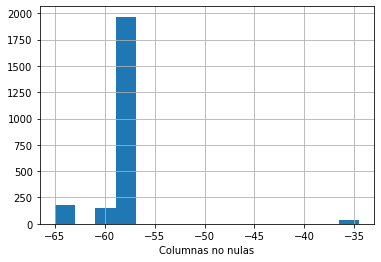

In [122]:
plt.hist(df.X[df.X < 0], bins= 15)
plt.xlabel('Columnas no nulas')
plt.grid()
plt.show()

Codigo de transformacion

In [131]:
df.Y = df.Y.replace(np.nan,80.5)
df.Y = df.Y.astype(str)

for idx in df.index:
    if type(df.Y.iloc[idx]) != float:
        df.Y.iloc[idx] = float(df.Y.iloc[idx].replace(',','.'))

print(df.iloc[1747])

ID_Clientes                                       1842
Provincia                                 Buenos Aires
Nombre_y_Apellido                    ESTELA INES REYNO
Domicilio            RUTA 193 KM. 28, 500 S/N  CHENAUT
Telefono                                    15-68-1183
Edad                                                46
Localidad                               RUTA 193 KM 28
X                                                 80.5
Y                                                -34.0
Name: 1747, dtype: object


In [132]:
df[df.Y.isna() == True]

,ID_Clientes,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y


In [133]:
print(df.Y.median())
print(df.Y.max())
print(df.Y.min())

-34.6379588
80.5
-58.57733943


In [134]:
df[df.Y == 80.5]

,ID_Clientes,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
128,141,Buenos Aires,DORA SZAFIR,nan,4690-6533,19,RAFAEL CASTILLO,80.5,80.5
342,380,Buenos Aires,"Martinez, Santiago Alb",MAURE Y C. URUGUAYO 3360 LAS HIGUERITAS,4246-0347,18,LANUS ESTE,80.5,80.5
479,527,Buenos Aires,"Gimenez Mora, Blas Ignacio",nan,4768-0607,20,CIUDAD VILLA BALLESTER,80.5,80.5
489,537,Buenos Aires,"Bigatti, Jose",nan,4720-5675,42,CIUDAD JARDIN DEL LIBERTADOR,80.5,80.5
500,548,Buenos Aires,"Gallucci, Domingo",ROMA Y CAMINO REAL 188 EZEIZA,43-1051,20,CARLOS SPEGAZZIN,80.5,80.5
521,569,Buenos Aires,"Maldonado, Bernardo",nan,4284-1547,50,MONTE GRANDE,80.5,80.5
563,612,Buenos Aires,"Sanchez, Raul Angel",nan,4755-0793,64,VILLA MAIPU,80.5,80.5
579,628,Buenos Aires,"Usarralde, Juan Martin",nan,4713-2859,44,PARQUE SAN LORENZO,80.5,80.5
581,630,Buenos Aires,"Lagos, Osvaldo",nan,4720-2374,30,CIUDAD VILLA BALLESTER,80.5,80.5
585,634,Buenos Aires,"Varela, Norberto Enrique",nan,4729-9013,48,VILLA GODOY CRUZ,80.5,80.5


In [135]:
df.Y.describe()

count     2384.0
unique    2328.0
top         80.5
freq        52.0
Name: Y, dtype: float64

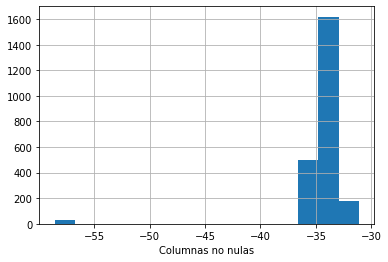

In [137]:
plt.hist(df.Y[df.Y < 0], bins= 15)
plt.xlabel('Columnas no nulas')
plt.grid()
plt.show()

In [140]:
df[df.Y < -30].head()

,ID_Clientes,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,-58.81850307,-34.309971
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,-58.73073751,-34.939083
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,-59.12794068,-34.430822
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45, 500 S/N EL PELIGRO",49-2883,29,RUTA SOL,-58.14393954,-34.920527
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,-58.89381,-34.944447


Codigo automatizado

In [ ]:
df.Y = df.Y.replace(np.nan,80.5)
df.Y = df.Y.astype(str)

for idx in df.index:
    if type(df.Y.iloc[idx]) != float:
        df.Y.iloc[idx] = float(df.Y.iloc[idx].replace(',','.'))